# Example Chapter 5

This notebook is the example that is used in the reader of Modules M4 and M5 in chapter 5 on the numerical simulation of a pendulum. The calculations are available in **Matlab**, **Mathematica** and **Python**.
This is the *Python* version. 

#### Initialisation

In [1]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline
from scipy.integrate import odeint

#### The model

$$ m l^2 \frac{d^2 \theta}{d t^2} + m g l \sin(\theta) = T_c $$

This non-linear second-order differential equation can be lineralized for small angles $\theta$ to:

$$ m l^2 \frac{d^2 \theta}{d t^2} + m g l \theta = T_c $$

Before the model can be made we have to modify the second-order differential equation to a set of two first-order differential equations.

$$ \frac{d q_1}{d t} = - \frac{g}{l} \sin(q_0) + \frac{T_c}{m l^2} $$
$$ \frac{d q_0}{d t} = q_1 $$

The parameter values, the two models (linear, and non-linear) are defined in this cell, as is the time, and signal vectors. The models are also run in this cell.

In [2]:
g=9.82
l=1.0
m=0.2
tc=1.0
t0=0.0
t1=1.0
tf=16.0
y0=np.array([0.0,0.0])

def dTheta_dt(theta, t):
    tci=0.0
    if t<=t1:
        tci=tc
    else:
        tci=0.0
    return [theta[1], -(g/l) * np.sin(theta[0])+ tci/(m * 1**2)]
def dThetal_dt(theta, t):
    tci=0.0
    if t<=t1:
        tci=tc
    else:
        tci=0.0
    return [theta[1], -(g/l) * theta[0] + tci/(m * 1**2)]

ts = np.linspace(0.0, tf, 300)
theta0 = [0.0, 0.0]
thetas = odeint(dTheta_dt, theta0, ts)
thetasl = odeint(dThetal_dt, theta0, ts)
thetaOp = thetas[:,0]
thetaOs = thetas[:,1]
thetaOpl = thetasl[:,0]
thetaOsl = thetasl[:,1]

#### Plotting the results of the model

In this cell the results are presented in a plot.

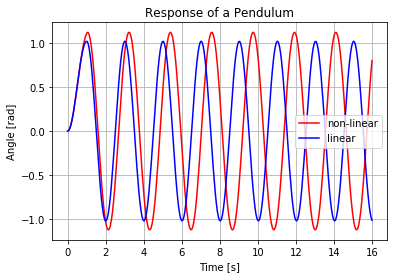

In [3]:
plt.plot(ts, thetaOp, 'r', label="non-linear")
plt.plot(ts, thetaOpl, 'b', label="linear")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.legend()
plt.grid(True)
plt.title("Response of a Pendulum");

#### Conclusion

From the graph we clearly observe that the results of the linear (blue) and non-linear (red) model are significanly different. For a driving force that is this large, the approximation we made is not valid any more. The angel of the pendulum is about 86 degree, which is too large for the approximation of the Sine function by the angle.

#### Re-evaluation of the model, with a different drive of the system that is much smaller.

In [4]:
tc=0.2
thetas = odeint(dTheta_dt, theta0, ts)
thetasl = odeint(dThetal_dt, theta0, ts)
thetaOp = thetas[:,0]
thetaOs = thetas[:,1]
thetaOpl = thetasl[:,0]
thetaOsl = thetasl[:,1]

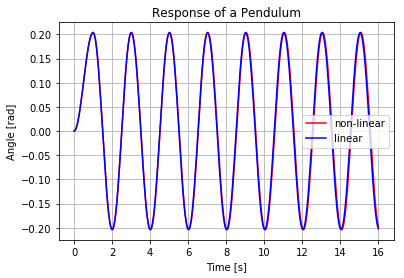

In [5]:
plt.figure()
plt.plot(ts, thetaOp, 'r', label="non-linear")
plt.plot(ts, thetaOpl, 'b', label="linear")
plt.xlabel("Time [s]")
plt.ylabel("Angle [rad]")
plt.legend()
plt.grid(True)
plt.title("Response of a Pendulum");

#### Conclusion

Here the driving force is ten times lower, showing a good overlap between the results for the linear (blue) and non-linear (red) model.